In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [112]:
data=pd.read_csv("music-mental.csv")

In [113]:
#data.info #data.head() #data.shape 3data.dtypes
data.describe(exclude='number').T
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,735.0,2.520680e+01,1.205497e+01,10.0,18.0,21.0,28.0,89.0
Hours per day,736.0,3.572758e+00,3.028199e+00,0.0,2.0,3.0,5.0,24.0
BPM,629.0,1.589948e+06,3.987261e+07,0.0,100.0,120.0,144.0,999999999.0
Anxiety,736.0,5.837636e+00,2.793054e+00,0.0,4.0,6.0,8.0,10.0
Depression,736.0,4.796196e+00,3.028870e+00,0.0,2.0,5.0,7.0,10.0
Insomnia,736.0,3.738451e+00,3.088689e+00,0.0,1.0,3.0,6.0,10.0
OCD,736.0,2.637228e+00,2.842017e+00,0.0,0.0,2.0,5.0,10.0


In [114]:
data['Fav genre'].value_counts()

Rock                188
Pop                 114
Metal                88
Classical            53
Video game music     44
EDM                  37
R&B                  35
Hip hop              35
Folk                 30
K pop                26
Country              25
Rap                  22
Jazz                 20
Lofi                 10
Gospel                6
Latin                 3
Name: Fav genre, dtype: int64

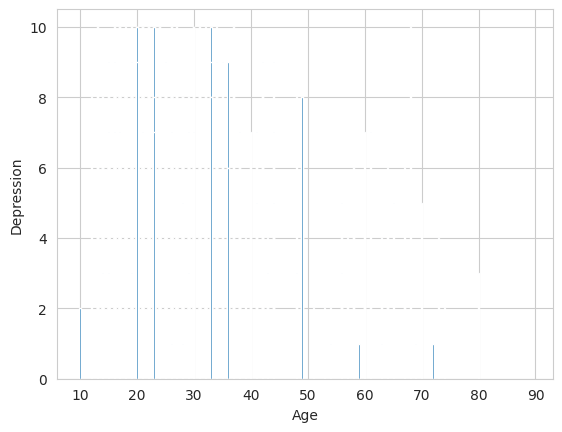

In [115]:
x_axis=data.Age
y_axis=data.Depression
plt.bar(x_axis,y_axis, width = 0.2)
plt.xlabel("Age")
plt.ylabel("Depression")
plt.show()

In [116]:
data = data.drop_duplicates()
data.dropna(inplace=True)
data['Age'].fillna(data['Age'].mean(), inplace=True)
data.drop(['Timestamp', 'Permissions' , 'Foreign languages'], axis=1, inplace=True)

In [117]:
cleaned_data = data[(data['Age'] >= 15) & (data['Age'] <= 70) & (data['Hours per day'] >= 1) & (data['Hours per day'] < 10) ]
cleaned_data.shape

(535, 30)

<Axes: >

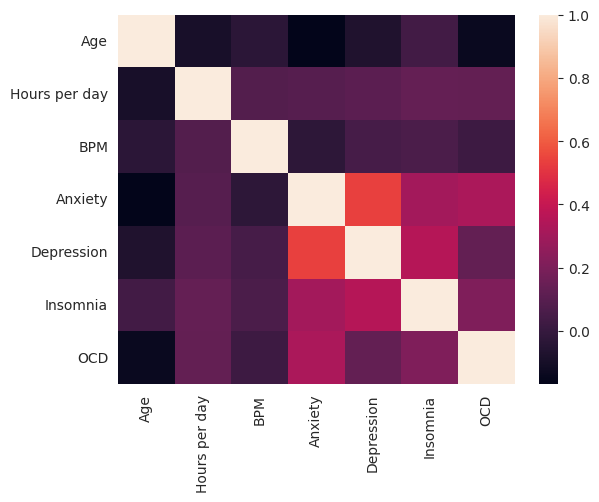

In [118]:
correlation = cleaned_data.corr(numeric_only=True)['Age']
sns.heatmap(cleaned_data.corr(numeric_only=True))

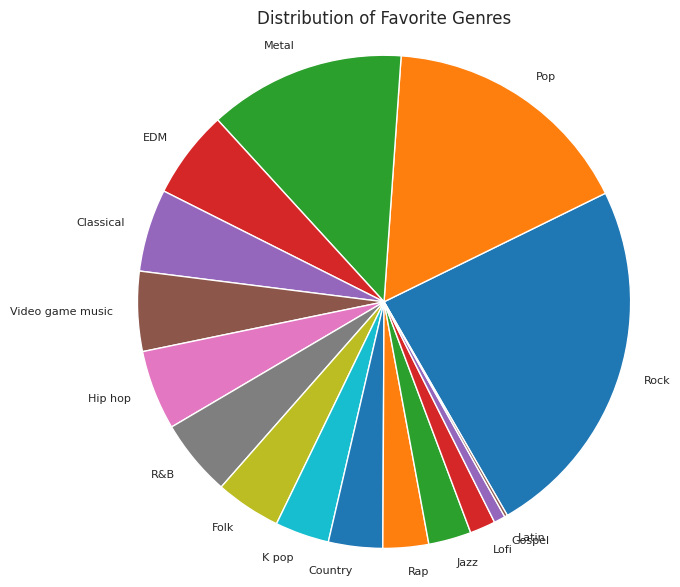

In [119]:
genre_counts = cleaned_data['Fav genre'].value_counts()

plt.figure(figsize=(7, 7))
pie_chart = plt.pie(genre_counts, labels=genre_counts.index, startangle=300)

for label in pie_chart[1]:
    label.set_fontsize(8)

plt.title('Distribution of Favorite Genres')
plt.axis('equal')
plt.show()

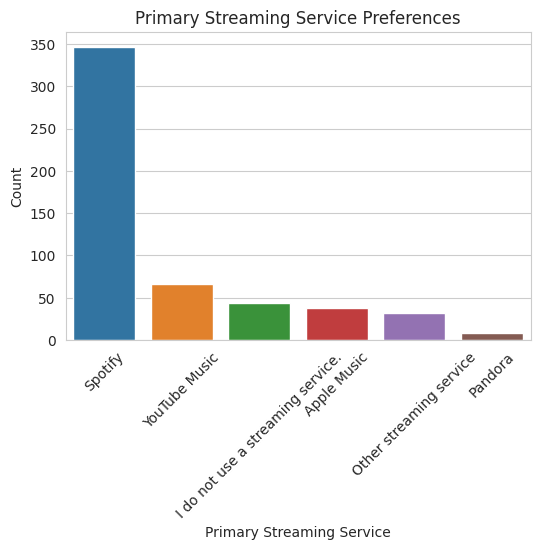

In [120]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Primary streaming service', data=cleaned_data)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Primary Streaming Service Preferences')
plt.xlabel('Primary Streaming Service')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='While working', ylabel='count'>

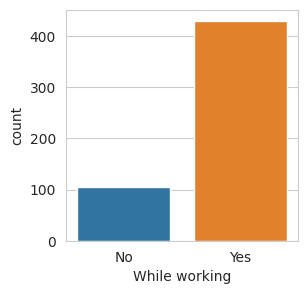

In [121]:
plt.figure(figsize=(3,3))
sns.countplot(x=cleaned_data['While working'])

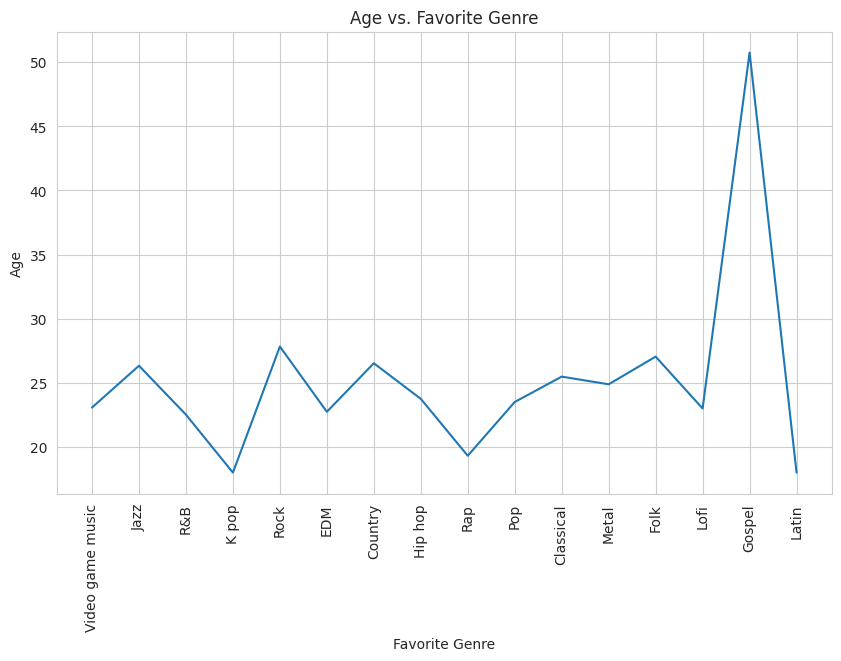

In [122]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=cleaned_data['Fav genre'], y=cleaned_data['Age'], errorbar=None)
plt.xticks(rotation=90)

plt.title('Age vs. Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Age')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

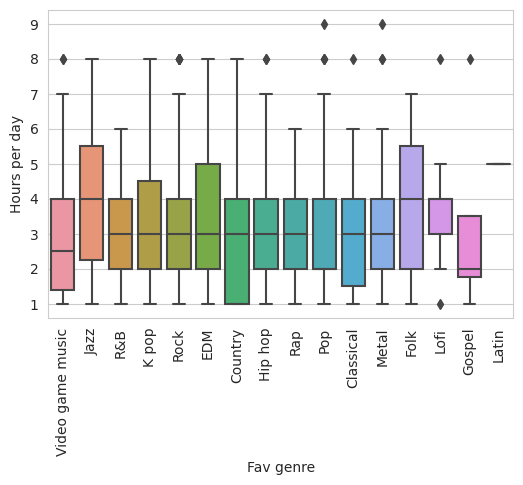

In [123]:
plt.figure(figsize=(6,4))
sns.boxplot(x=cleaned_data['Fav genre'], y=cleaned_data['Hours per day'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

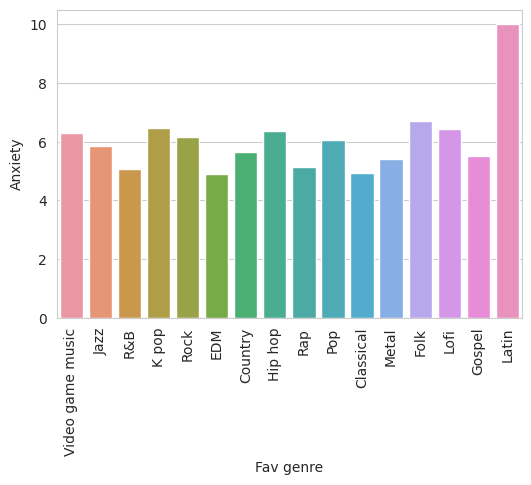

In [124]:
plt.figure(figsize=(6,4))
sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Anxiety'], errwidth=0)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

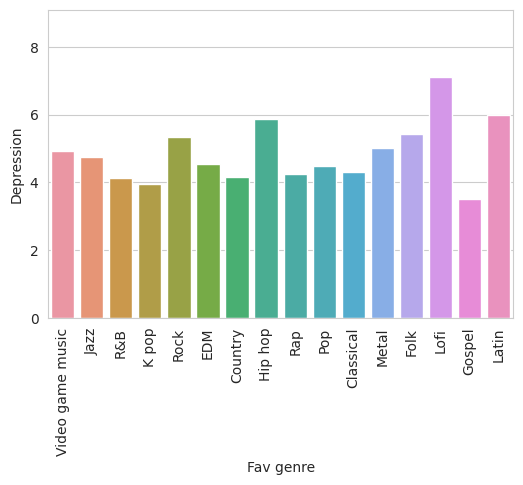

In [125]:
plt.figure(figsize=(6,4))
sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Depression'], errwidth=0)
plt.xticks(rotation=90)

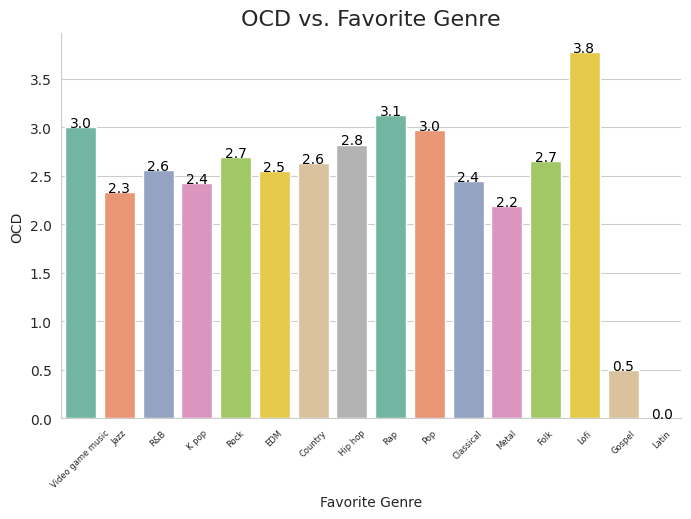

In [126]:
custom_palette = sns.color_palette("Set2", len(cleaned_data['Fav genre'].unique()))
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['OCD'], palette=custom_palette, errorbar=None)
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black')

plt.title('OCD vs. Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=10)
plt.ylabel('OCD', fontsize=10)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=6)
sns.despine()
plt.show()


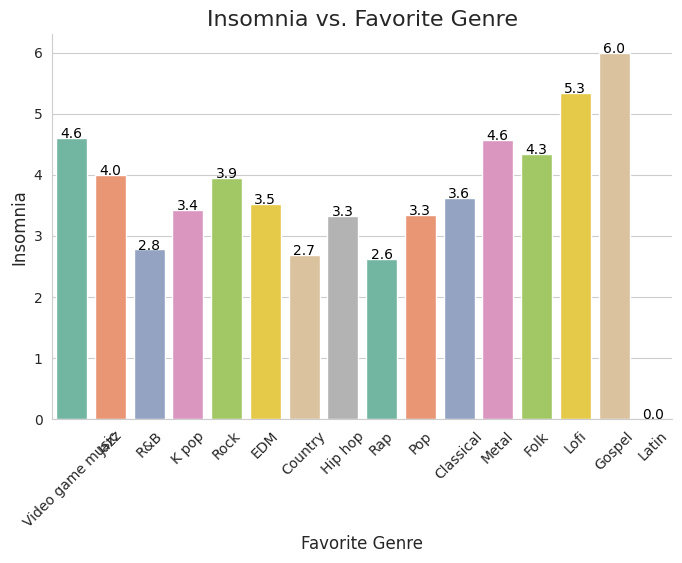

In [127]:
custom_palette = sns.color_palette("Set2", len(cleaned_data['Fav genre'].unique()))
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")
ax = sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Insomnia'], palette=custom_palette, errorbar=None)
plt.xticks(rotation=90)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='baseline', fontsize=10, color='black')

plt.title('Insomnia vs. Favorite Genre', fontsize=16)
plt.xlabel('Favorite Genre', fontsize=12)
plt.ylabel('Insomnia', fontsize=12)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontsize=10)
sns.despine()
plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

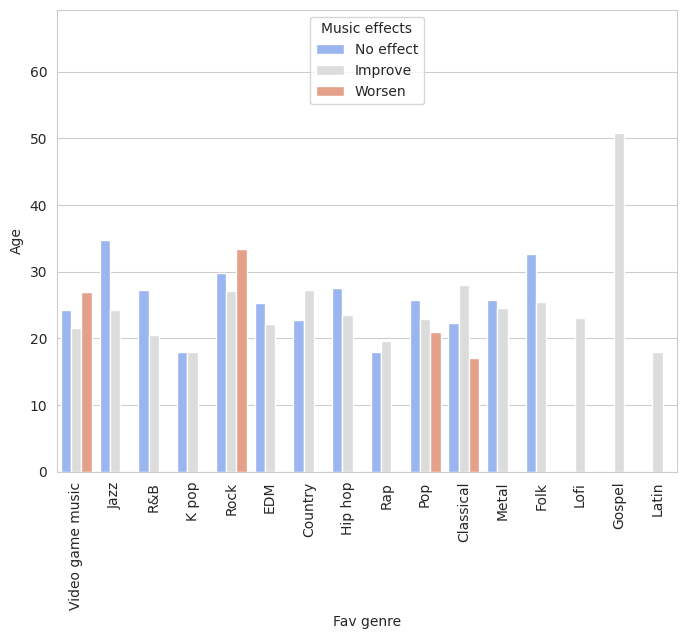

In [128]:
plt.figure(figsize=(8,6))
sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Age'], hue=cleaned_data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Video game music'),
  Text(1, 0, 'Jazz'),
  Text(2, 0, 'R&B'),
  Text(3, 0, 'K pop'),
  Text(4, 0, 'Rock'),
  Text(5, 0, 'EDM'),
  Text(6, 0, 'Country'),
  Text(7, 0, 'Hip hop'),
  Text(8, 0, 'Rap'),
  Text(9, 0, 'Pop'),
  Text(10, 0, 'Classical'),
  Text(11, 0, 'Metal'),
  Text(12, 0, 'Folk'),
  Text(13, 0, 'Lofi'),
  Text(14, 0, 'Gospel'),
  Text(15, 0, 'Latin')])

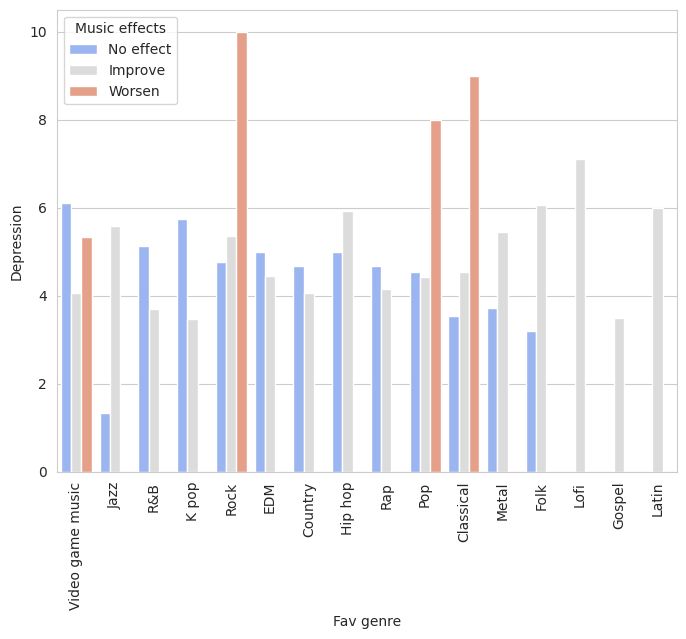

In [129]:
plt.figure(figsize=(8,6))
sns.barplot(x=cleaned_data['Fav genre'], y=cleaned_data['Depression'], hue=cleaned_data['Music effects'], errwidth=0, palette='coolwarm')
plt.xticks(rotation=90)

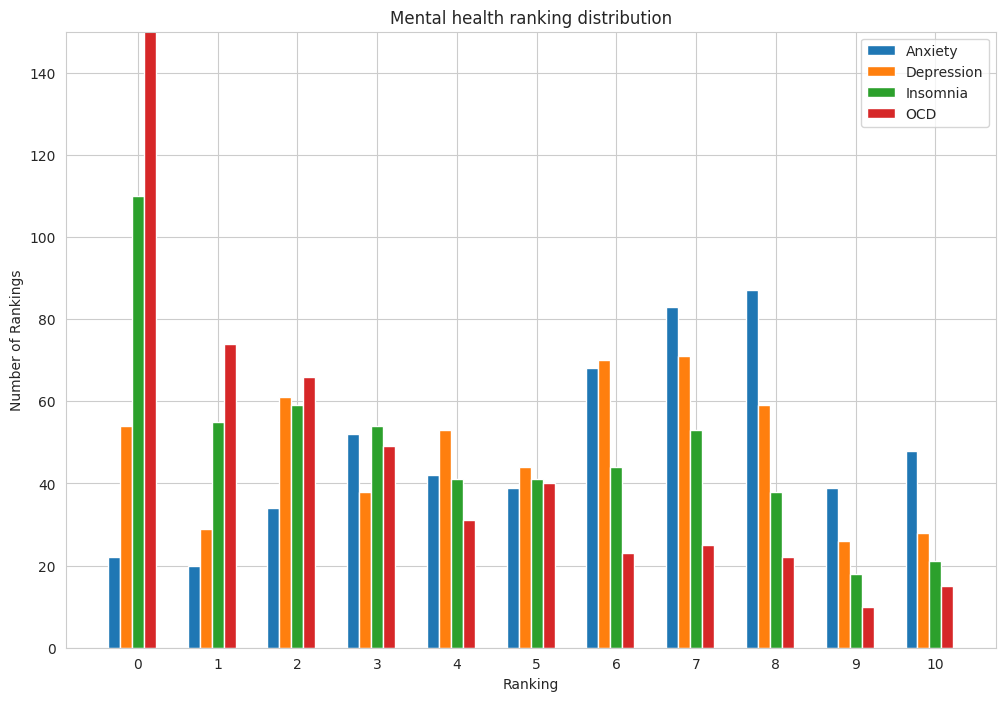

In [130]:
mlabels = ["Anxiety", "Depression", "Insomnia", "OCD"]

mental_data = cleaned_data[mlabels]
mental_data.round(0).astype(int)

disorder_count = []
for disorder in mlabels:
    x=0
    while x !=11:
        count =  (mental_data[disorder].values == x).sum()
        disorder_count.append(count)
        x +=1

labels = ['0','1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
x = np.arange(len(labels))
width = 0.15

fig, ax = plt.subplots(figsize=(12, 8))

b1 = ax.bar(x-2*width, disorder_count[0:11], width, label="Anxiety")
b2 = ax.bar(x-width, disorder_count[11:22], width, label="Depression")
b3 = ax.bar(x, disorder_count[22:33], width, label="Insomnia")
b4 = ax.bar(x+width, disorder_count[33:], width, label="OCD")

ax.set_ylim([0, 150])
ax.set_ylabel('Number of Rankings')
ax.set_xlabel('Ranking')
ax.set_title('Mental health ranking distribution')
ax.set_xticks(x, labels)
ax.legend()
plt.show()

In [131]:
max(disorder_count)
for disorder in mlabels:
    disorder_avg = str(round(cleaned_data[disorder].mean(), 2))
    print(disorder + ' average: ' + disorder_avg)

Anxiety average: 5.85
Depression average: 4.87
Insomnia average: 3.77
OCD average: 2.65


<Axes: title={'center': 'Effects of Music on Mental Health'}, ylabel='Music effects'>

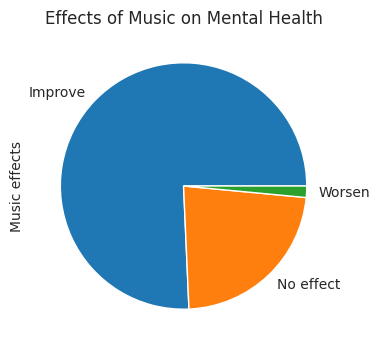

In [132]:
plt.figure(figsize=(5,4))
plt.title('Effects of Music on Mental Health')

effects = cleaned_data['Music effects'].value_counts()
effects.plot(kind='pie')

In [133]:
cleaned_data = cleaned_data[(cleaned_data.BPM < 500) & (cleaned_data.BPM > 20)]
cleaned_data['BPM'].max()
cleaned_data['BPM'].min()

52.0

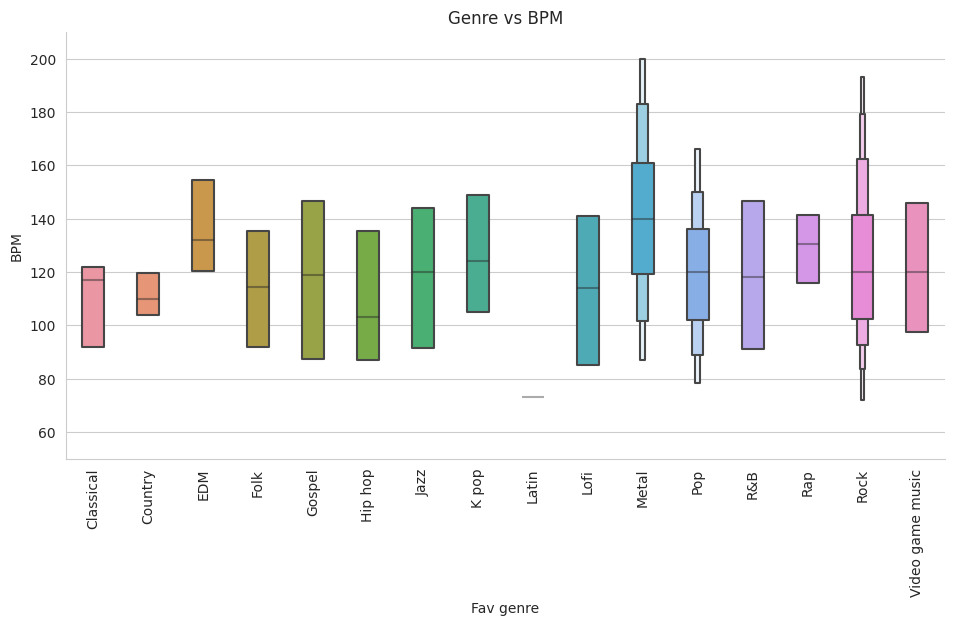

In [134]:
sns.catplot(data=cleaned_data.sort_values("Fav genre"), x="Fav genre", y="BPM", kind="boxen", height=5, aspect=2,width = 0.4, showfliers=False)

plt.xticks(rotation = 90)
plt.title('Genre vs BPM')
plt.ylim(50, 210)
plt.show()

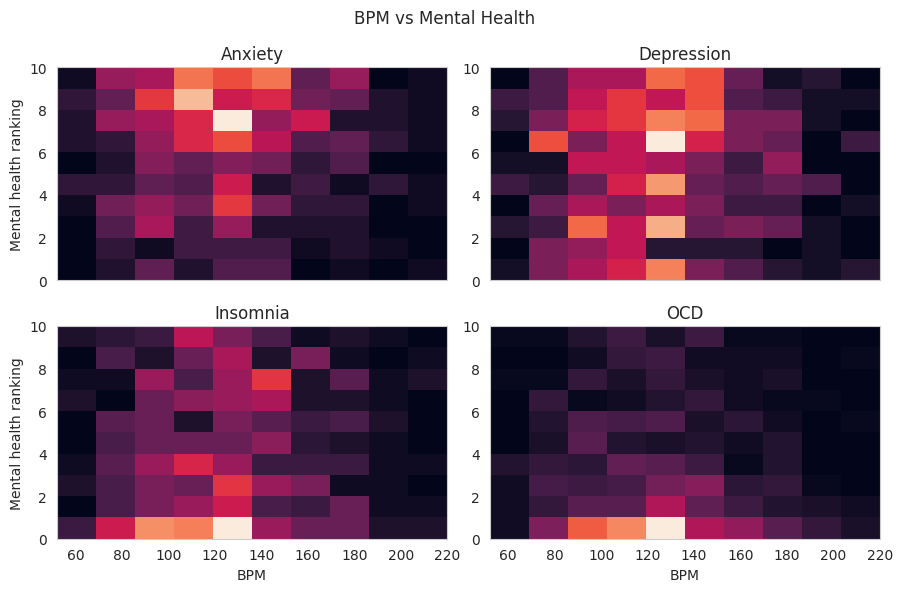

In [135]:
plt.figure(figsize=(9, 6))
plt.suptitle("BPM vs Mental Health")

y = cleaned_data["Anxiety"]
y2 = cleaned_data["Depression"]
y3 = cleaned_data["Insomnia"]
y4 = cleaned_data["OCD"]
x = cleaned_data["BPM"]

ax = plt.subplot(221)
plt.title('Anxiety')
plt.xticks([])
plt.ylabel('Mental health ranking')
plt.hist2d(x, y, density=True)

ax = plt.subplot(222)
plt.title('Depression')
plt.xticks([])
plt.hist2d(x, y2, density=True)

ax = plt.subplot(223)
plt.title('Insomnia')
plt.ylabel('Mental health ranking')
plt.xlabel('BPM')
plt.hist2d(x, y3, density=True)

ax = plt.subplot(224)
plt.title('OCD')
plt.xlabel('BPM')
plt.hist2d(x, y4, density=True)

plt.tight_layout()
plt.show()


In [136]:
X = cleaned_data[['Age', 'Hours per day']]
y = cleaned_data['Depression']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
model = LinearRegression()

In [138]:
model.fit(X_train, y_train)

LinearRegression()

In [139]:
y_pred = model.predict(X_test)

In [140]:
#Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 8.332380312610514


In [141]:
#R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R2): {r2}')

R-squared (R2): 0.015744542381966764


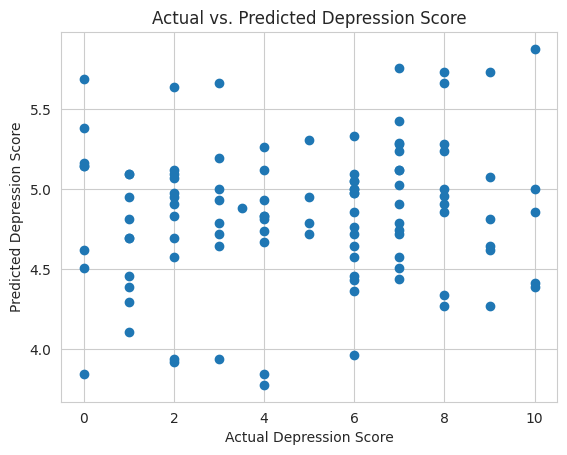

In [142]:
#Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Depression Score')
plt.ylabel('Predicted Depression Score')
plt.title('Actual vs. Predicted Depression Score')
plt.show()


other way

In [143]:
cleaned_data['MentalHealth'] = cleaned_data[['OCD', 'Insomnia', 'Anxiety', 'Depression']].sum(axis=1)

In [144]:
cleaned_data['MentalHealth'].info

<bound method Series.info of 2      26.0
3      22.0
4      23.0
5      30.0
6      18.0
       ... 
731    22.0
732    12.0
733     8.0
734     8.0
735    11.0
Name: MentalHealth, Length: 529, dtype: float64>

In [145]:
# Encode 'favorite genre' using label encoding
label_encoder = LabelEncoder()
cleaned_data['Fav genre'] = label_encoder.fit_transform(cleaned_data['Fav genre'])

In [146]:
X = cleaned_data[['Fav genre', 'Hours per day']]
y = cleaned_data['MentalHealth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [147]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [148]:
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 60.92
R-squared: 0.07


In [149]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.11561543 0.61497484]
Intercept: 13.906031421515362


In [150]:
# Interpretation of coefficients
coef_favorite_genre, coef_hours_listening = model.coef_
intercept = model.intercept_

print(f"Coefficient for FavoriteGenre: {coef_favorite_genre:.2f}")
print(f"Coefficient for HoursListening: {coef_hours_listening:.2f}")
print(f"Intercept: {intercept:.2f}")


Coefficient for FavoriteGenre: 0.12
Coefficient for HoursListening: 0.61
Intercept: 13.91


these coefficients are interpret the impact of features on MentalHealth.
a positive coef_hours_listening suggests that more hours of listening are associated with higher MentalHealth.

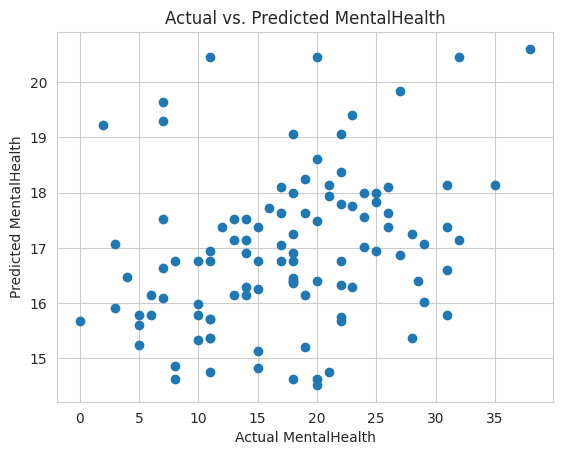

In [151]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual MentalHealth")
plt.ylabel("Predicted MentalHealth")
plt.title("Actual vs. Predicted MentalHealth")
plt.show()

# Now we can use the trained model to make predictions on new data


In [152]:
# let's predict Mental Health for a new data point:
new_data_point = pd.DataFrame({'Fav genre': ['Rock'], 'Hours per day': [3]})

In [153]:
new_data_point_encoded = label_encoder.transform(new_data_point['Fav genre'])
new_data_point['Fav genre'] = new_data_point_encoded
predicted_mental_health = model.predict(new_data_point)
print(f"Predicted Mental Health: {predicted_mental_health[0]:.2f}")


Predicted Mental Health: 17.37


17.37 is healthy

  
  *           

In [154]:
X = cleaned_data[['Fav genre', 'Hours per day']]
y = cleaned_data[['OCD', 'Insomnia', 'Anxiety', 'Depression']]

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
#Creating separate regression models for each mental health indicator
models = {}

for mental_health_indicator in ['OCD', 'Insomnia', 'Anxiety', 'Depression']:
    model = LinearRegression()
    model.fit(X_train, y_train[mental_health_indicator])
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test[mental_health_indicator], y_pred)
    r2 = r2_score(y_test[mental_health_indicator], y_pred)

    print(f"Results for {mental_health_indicator}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R-squared: {r2:.2f}")

    models[mental_health_indicator] = model

Results for OCD:
Mean Squared Error: 8.78
R-squared: 0.01
Results for Insomnia:
Mean Squared Error: 8.20
R-squared: 0.04
Results for Anxiety:
Mean Squared Error: 6.74
R-squared: 0.04
Results for Depression:
Mean Squared Error: 8.32
R-squared: 0.02


In [161]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='sklearn')


prediction:

In [162]:
from sklearn.preprocessing import LabelEncoder

new_data_point = {'Fav genre': 'Rock', 'Hours per day': 3}

mental_health_indicator = 'OCD'

#converting 'Fav genre' to a numerical value
new_data_point_encoded = {'Fav genre': label_encoder.transform([new_data_point['Fav genre']])[0], 'Hours per day': new_data_point['Hours per day']}

predicted_score = models[mental_health_indicator].predict([list(new_data_point_encoded.values())])

print(f"Predicted {mental_health_indicator} score: {predicted_score[0]:.2f}")


Predicted OCD score: 2.50


In [ ]:
mental_health_indicators = ['OCD', 'Anxiety', 'Depression', 'Insomnia']

In [164]:
new_data_point = {'Fav genre': 'Rock', 'Hours per day': 3}

predicted_scores = {}

for mental_health_indicator in mental_health_indicators:

    new_data_point_encoded = {'Fav genre': label_encoder.transform([new_data_point['Fav genre']])[0], 'Hours per day': new_data_point['Hours per day']}


    predicted_score = models[mental_health_indicator].predict([list(new_data_point_encoded.values())])


    predicted_scores[mental_health_indicator] = predicted_score[0]


for indicator, score in predicted_scores.items():
    print(f"Predicted {indicator} score: {score:.2f}")


Predicted OCD score: 2.50
Predicted Anxiety score: 5.97
Predicted Depression score: 5.00
Predicted Insomnia score: 3.90
